# 2. Data Understanding
## 2.1 Input data

In [1]:
# Section must be included at the beginning of each new notebook. Remember to change the app name.
# If you're using VirtualBox, change the below to '/home/user/spark-2.1.1-bin-hadoop2.7'
import findspark
findspark.init('/home/ubuntu/spark-2.1.1-bin-hadoop2.7')
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('linear_regression_adv').getOrCreate()

# If you're getting an error with numpy, please type 'sudo pip3 install numpy --user' into the console.
# If you're getting an error with another package, type 'sudo pip3 install PACKAGENAME --user'. 
# Replace PACKAGENAME with the relevant package (such as pandas, etc).
from pyspark.ml.regression import LinearRegression

# First, let's import the data. Note that we can infer the schema as it's a CSV file.
df1990 = spark.read.csv("SN1990.csv",inferSchema=True,header=True)
df2000 = spark.read.csv("SN2000.csv",inferSchema=True,header=True)
df2008 = spark.read.csv("SN2008.csv",inferSchema=True,header=True)
df2009 = spark.read.csv("SN2009.csv",inferSchema=True,header=True)
df2010 = spark.read.csv("SN2010.csv",inferSchema=True,header=True)
df2011 = spark.read.csv("SN2011.csv",inferSchema=True,header=True)
df2012 = spark.read.csv("SN2012.csv",inferSchema=True,header=True)
df2013 = spark.read.csv("SN2013.csv",inferSchema=True,header=True)
df2014 = spark.read.csv("SN2014.csv",inferSchema=True,header=True)
df2015 = spark.read.csv("SN2015.csv",inferSchema=True,header=True)
df2016 = spark.read.csv("SN2016.csv",inferSchema=True,header=True)
df2017 = spark.read.csv("SN2017.csv",inferSchema=True,header=True)
#inport the data set after filling the NAs
df1990f = spark.read.csv("SN1990F.csv",inferSchema=True,header=True)
df2000f = spark.read.csv("SN2000F.csv",inferSchema=True,header=True)
df2008f = spark.read.csv("SN2008F.csv",inferSchema=True,header=True)
df2009f = spark.read.csv("SN2009F.csv",inferSchema=True,header=True)
df2010f = spark.read.csv("SN2010F.csv",inferSchema=True,header=True)
df2011f = spark.read.csv("SN2011F.csv",inferSchema=True,header=True)
df2012f = spark.read.csv("SN2012F.csv",inferSchema=True,header=True)
df2013f = spark.read.csv("SN2013F.csv",inferSchema=True,header=True)
df2014f = spark.read.csv("SN2014F.csv",inferSchema=True,header=True)
df2015f = spark.read.csv("SN2015F.csv",inferSchema=True,header=True)
df2016f = spark.read.csv("SN2016F.csv",inferSchema=True,header=True)
df2017f = spark.read.csv("SN2017F.csv",inferSchema=True,header=True)

In [2]:
# Let's explore. Here's the first row of the data.
print(df1990.head(1))

# And the entire data structure. 
df1990.printSchema()

[Row(CN='Leastdevelopedcountries', GDP=Decimal('146000000000'), FDINI=477000000.0, NFA=None, GDPg=0.099339613, GDPpcg=-2.575586368, GCaFg=None, Ind1=None, ind2=None, Ser=None, ExGSgp=None, ADRold=5.968669976, ADRyoun=85.58148649, PPg=2.745642372, PPf=50.20598922, PPm=49.79401078, PP1519f=10.41887933, PP1519m=10.64158095, PP2024f=8.901835419, PP2024m=8.90969826, PP2529m=7.365186431, PP2529f=7.407481048, PP65above=3.115982825, PP65afnum=8534747, PP65af=3.327885947, PP1564m=51.83142093, PP1564f=52.57680582, Lab1524f=50.09346038, Lab1524m=69.11372515, Lab1524tot=59.62070009, Labf=40.4122482, Labtot=195299726, RFtoMlabpartcp=70.42506649)]
root
 |-- CN: string (nullable = true)
 |-- GDP: decimal(12,0) (nullable = true)
 |-- FDINI: double (nullable = true)
 |-- NFA: double (nullable = true)
 |-- GDPg: double (nullable = true)
 |-- GDPpcg: double (nullable = true)
 |-- GCaFg: double (nullable = true)
 |-- Ind1: double (nullable = true)
 |-- ind2: double (nullable = true)
 |-- Ser: double (null

In [3]:
df1990.describe().show()

+-------+-----------+--------------------+-------------------+--------------------+------------------+-------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+-----------------+------------------+------------------+------------------+-----------------+------------------+-----------------+------------------+------------------+------------------+-------------------+------------------+
|summary|         CN|                 GDP|              FDINI|                 NFA|              GDPg|             GDPpcg|             GCaFg|              Ind1|              ind2|               Ser|            ExGSgp|            ADRold|           ADRyoun|               PPg|               PPf|               PPm|           PP1519f|           PP1519m|           PP202

## 2.2Explore the data

In [4]:
#select columns
#df.columns[:3 and 5]
import pyspark.sql.functions as func
SCol=['GDPg','FDINI','NFA', 'GCaFg','PPg', 'PP1519f', 'Lab1524f', 'RFtoMlabpartcp']
df1990na = df1990.na.drop()
Y1990_col=df1990na.select('CN','GDPg','FDINI','NFA', 'GCaFg','PPg', 'PP1519f', 'Lab1524f', 'RFtoMlabpartcp')
Y1990_col=Y1990_col.withColumn('GDPg',func.round(Y1990_col['GDPg'], 2))
Y1990_col=Y1990_col.withColumn('FDINI',func.round(Y1990_col['FDINI'], 2))
Y1990_col=Y1990_col.withColumn('NFA',func.round(Y1990_col['NFA'], 2))
Y1990_col=Y1990_col.withColumn('GCaFg',func.round(Y1990_col['GCaFg'], 2))
Y1990_col=Y1990_col.withColumn('PPg',func.round(Y1990_col['PPg'], 2))
Y1990_col=Y1990_col.withColumn('PP1519f',func.round(Y1990_col['PP1519f'], 2))
Y1990_col=Y1990_col.withColumn('Lab1524f',func.round(Y1990_col['Lab1524f'], 2))
Y1990_col=Y1990_col.withColumn('RFtoMlabpartcp',func.round(Y1990_col['RFtoMlabpartcp'], 2))
Y1990_col.show(20)
#another way
df1990.select('GDPg','FDINI','NFA', 'GCaFg','PPg', 'PP1519f', 'Lab1524f', 'RFtoMlabpartcp').describe().show(truncate = 8)


+--------------+-----+----------+----------+------+----+-------+--------+--------------+
|            CN| GDPg|     FDINI|       NFA| GCaFg| PPg|PP1519f|Lab1524f|RFtoMlabpartcp|
+--------------+-----+----------+----------+------+----+-------+--------+--------------+
|    Bangladesh| 5.62|3238781.19|   -4.85E8|  5.52|2.47|  10.76|   21.06|         26.19|
|         Benin| 8.98|    6.24E7|    1.15E8| 46.21|3.24|  10.04|   55.07|         64.26|
|       Bolivia| 4.64|    2.72E7|  -2.056E8| 17.68|1.96|  10.45|   46.75|         68.28|
|      Cameroon|-6.11|   -1.13E8|   -6.28E8|  1.54|2.97|  10.09|   57.88|         84.86|
|       Comoros| 5.09|  393003.1|   -1.86E7| 13.77|2.95|  10.19|   18.54|         58.38|
|      CongoRep|  1.0|    2.26E7|   -2.93E8| 14.74|2.72|  10.71|   46.34|         92.29|
|  EgyptArabRep|  5.7|    7.34E8|1.35595E10| -0.63|2.48|   9.58|    20.4|         29.44|
|      Honduras|  0.1|    4.35E7|   -1.61E8|  3.24|2.89|  10.91|   38.86|         48.39|
|         India| 5.53

In [5]:
Y2017f_col=df2017f.select('CN','GDPg','FDINI','NFA', 'GCaFg','PPg', 'PP1519f', 'Lab1524f', 'RFtoMlabpartcp')
Y2017f_col.show(truncate = 8)
Y2017f_col.describe().show(truncate = 8)

+--------+--------+--------+--------+--------+--------+--------+--------+--------------+
|      CN|    GDPg|   FDINI|     NFA|   GCaFg|     PPg| PP1519f|Lab1524f|RFtoMlabpartcp|
+--------+--------+--------+--------+--------+--------+--------+--------+--------------+
|Least...|5.264...| 1.33E10|    null|14.09...|2.358...|10.52...|48.50...|      75.92...|
|Afgha...|2.595...| 5.339E7|  4.47E8|0.174...|2.490...|11.85...|22.86...|      22.45...|
|  Angola|0.721...|3.272...|-4.07...|21.26...|3.313...|10.50...|56.85...|      94.04...|
|Bangl...|7.284...|  2.15E9| -7.52E9|10.14...|1.048...|9.695...|23.46...|      41.39...|
|   Benin|5.584...|2.253...|-6.13...|21.30...|2.752...|10.52...|45.63...|      93.91...|
|  Bhutan|6.818...|  -1.1E7| -3.64E8|2.901...|1.226...|9.645...|33.61...|      78.13...|
| Bolivia|4.195...|  7.25E8| -2.76E9|15.85...|1.492...|9.812...|35.10...|      69.05...|
|Burki...|6.742...|3.581...|-6.22...|10.17...|2.891...|10.67...|44.58...|      77.36...|
| Burundi|0.519...|4.

In [6]:
SCol

['GDPg',
 'FDINI',
 'NFA',
 'GCaFg',
 'PPg',
 'PP1519f',
 'Lab1524f',
 'RFtoMlabpartcp']

## Notice here, even a simplified table will take a long chunk of code to extract values and plot, This is quite low efficient. For simplicity reason, only this customized graph is shown. The rest carries out a similar procedure.

In [9]:
# For integer type features, you may want to replace the null value the average of that feature.
# Let's see how that's done using balance as an example.
from pyspark.sql.functions import mean

# Let's find the average. But the problem is, how do we get that information out of the DataFrame?
mean_GDPGrowth = df1990.select(mean('GDP')).show()

# We can use collect to return the DataFrame as a Python list. But this still doesn't look correct. 
# How do we remove all the outer layers and simply extract the value?
mean_GDPGrowth = df1990.select(mean('GDP')).collect()
print(mean_GDPGrowth)

# In this case, we'll need to use indexes. As it's a list, each piece of data has a unique place.
# If we look at the first place (0), you see that the outer brackets are stripped.
mean_GDPGrowth = mean_GDPGrowth[0]
print(mean_GDPGrowth)

# If we refer to the index again, the rest of outer information is stripped and we're finally left with the raw value!
mean_GDPGrowth = mean_GDPGrowth[0]
print(mean_GDPGrowth)

+----------------+
|        avg(GDP)|
+----------------+
|16110130468.9855|
+----------------+

[Row(avg(GDP)=Decimal('16110130468.9855'))]
Row(avg(GDP)=Decimal('16110130468.9855'))
16110130468.9855


[1.7082382395735294, 3.665534550054053, 4.906161520402597, 3.242358206766234, 5.491702315077919, 5.210858902168832, 4.596221347506493, 4.8423522012337665, 4.228381421307692, 3.4586620180512817, 3.1347140908974347, 3.8802650334813085] [1990, 2000, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017]


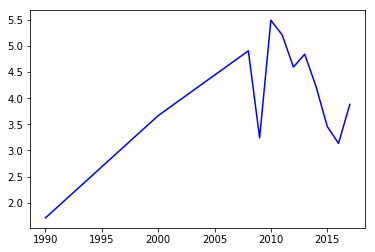

In [11]:
#Set the variable for pictures 
from pyspark.sql.functions import mean
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
year = [1990, 2000, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017]
mean_GDPGrowth = [0]*12

Temp = df1990.select(mean('GDPg')).collect()
Temp = Temp[0]
Temp = Temp[0]
mean_GDPGrowth[0]=Temp
Temp = df2000.select(mean('GDPg')).collect()
Temp = Temp[0]
Temp = Temp[0]
mean_GDPGrowth[1]=Temp
Temp = df2008.select(mean('GDPg')).collect()
Temp = Temp[0]
Temp = Temp[0]
mean_GDPGrowth[2]=Temp
Temp = df2009.select(mean('GDPg')).collect()
Temp = Temp[0]
Temp = Temp[0]
mean_GDPGrowth[3]=Temp
Temp = df2010.select(mean('GDPg')).collect()
Temp = Temp[0]
Temp = Temp[0]
mean_GDPGrowth[4]=Temp
Temp = df2011.select(mean('GDPg')).collect()
Temp = Temp[0]
Temp = Temp[0]
mean_GDPGrowth[5]=Temp
Temp = df2012.select(mean('GDPg')).collect()
Temp = Temp[0]
Temp = Temp[0]
mean_GDPGrowth[6]=Temp
Temp = df2013.select(mean('GDPg')).collect()
Temp = Temp[0]
Temp = Temp[0]
mean_GDPGrowth[7]=Temp
Temp = df2014.select(mean('GDPg')).collect()
Temp = Temp[0]
Temp = Temp[0]
mean_GDPGrowth[8]=Temp
Temp = df2015.select(mean('GDPg')).collect()
Temp = Temp[0]
Temp = Temp[0]
mean_GDPGrowth[9]=Temp
Temp = df2016.select(mean('GDPg')).collect()
Temp = Temp[0]
Temp = Temp[0]
mean_GDPGrowth[10]=Temp
Temp = df2017.select(mean('GDPg')).collect()
Temp = Temp[0]
Temp = Temp[0]
mean_GDPGrowth[11]=Temp
plt.plot(year, mean_GDPGrowth, color = "blue")
print(mean_GDPGrowth, year)


[-0.7397025178676472, 1.4358459333378382, 2.6069160500909083, 1.267527959194805, 3.2693199926103897, 3.170189395727272, 2.756122948999999, 2.5988592684415583, 2.178642938897435, 1.5036690417307692, 1.0547129821794867, 1.6671704151851954] [1990, 2000, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017]


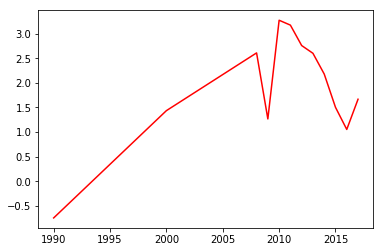

In [12]:

mean_GDPGperCapita = [0]*12

Temp = df1990.select(mean('GDPpcg')).collect()
Temp = Temp[0]
Temp = Temp[0]
mean_GDPGperCapita[0]=Temp
Temp = df2000.select(mean('GDPpcg')).collect()
Temp = Temp[0]
Temp = Temp[0]
mean_GDPGperCapita[1]=Temp
Temp = df2008.select(mean('GDPpcg')).collect()
Temp = Temp[0]
Temp = Temp[0]
mean_GDPGperCapita[2]=Temp
Temp = df2009.select(mean('GDPpcg')).collect()
Temp = Temp[0]
Temp = Temp[0]
mean_GDPGperCapita[3]=Temp
Temp = df2010.select(mean('GDPpcg')).collect()
Temp = Temp[0]
Temp = Temp[0]
mean_GDPGperCapita[4]=Temp
Temp = df2011.select(mean('GDPpcg')).collect()
Temp = Temp[0]
Temp = Temp[0]
mean_GDPGperCapita[5]=Temp
Temp = df2012.select(mean('GDPpcg')).collect()
Temp = Temp[0]
Temp = Temp[0]
mean_GDPGperCapita[6]=Temp
Temp = df2013.select(mean('GDPpcg')).collect()
Temp = Temp[0]
Temp = Temp[0]
mean_GDPGperCapita[7]=Temp
Temp = df2014.select(mean('GDPpcg')).collect()
Temp = Temp[0]
Temp = Temp[0]
mean_GDPGperCapita[8]=Temp
Temp = df2015.select(mean('GDPpcg')).collect()
Temp = Temp[0]
Temp = Temp[0]
mean_GDPGperCapita[9]=Temp
Temp = df2016.select(mean('GDPpcg')).collect()
Temp = Temp[0]
Temp = Temp[0]
mean_GDPGperCapita[10]=Temp
Temp = df2017.select(mean('GDPpcg')).collect()
Temp = Temp[0]
Temp = Temp[0]
mean_GDPGperCapita[11]=Temp

print(mean_GDPGperCapita, year)
plt.plot(year, mean_GDPGperCapita, color = "red")

In [13]:
#select condition and showing the corresponding values in 2017
df2017.filter("GDPg>5").select('CN','GDPg','PPg').show()
df2017.filter("GDPg>5 AND GDPg<7").select('CN','GDPg','PPg').show()

+--------------------+------------+----------------+
|                  CN|        GDPg|             PPg|
+--------------------+------------+----------------+
|Leastdevelopedcou...| 5.264221626|     2.358415027|
|          Bangladesh| 7.284208377|     1.048898039|
|               Benin| 5.584195081|     2.752297619|
|              Bhutan| 6.818777705|     1.226520086|
|         BurkinaFaso| 6.742653542|     2.891066437|
|            Cambodia| 6.814723618|     1.529902453|
|         CotedIvoire| 7.797005627|      2.49574384|
|             Eritrea|5.6531822202|1.87245523153333|
|            Ethiopia| 10.24581085|     2.463699254|
|               Ghana| 8.507156219|      2.19818485|
|              Guinea| 12.70155339|     2.558581179|
|        GuineaBissau|  5.91897567|     2.479606809|
|               India| 6.624227116|      1.12707106|
|           Indonesia| 5.067680274|     1.095377765|
|              LaoPDR| 6.892747966|     1.465996287|
|             Lesotho| 5.590876671|     1.3305

# 3 data preparation

In [14]:
# 'na' stands for Not Available. Using na, we can then use drop. 
# After using show, you'll find that the rows with the null values are gone. 
# After two-staged  
df1990cl = df1990.na.drop()
df1990cl.select('CN','GDPg','FDINI','NFA', 'GCaFg','PPg', 'PP1519f', 'Lab1524f', 'RFtoMlabpartcp').show()
df2000cl = df2000.na.drop()
df2008cl = df2008.na.drop()
df2009cl = df2009.na.drop()
df2010cl = df2010.na.drop()
df2011cl = df2011.na.drop()
df2012cl = df2012.na.drop()
df2013cl = df2013.na.drop()
df2014cl = df2014.na.drop()
df2015cl = df2015.na.drop()
df2016cl = df2016.na.drop()
df2017cl = df2017.na.drop()

+--------------+------------+-----------+----------+------------+-----------+-----------+-----------+--------------+
|            CN|        GDPg|      FDINI|       NFA|       GCaFg|        PPg|    PP1519f|   Lab1524f|RFtoMlabpartcp|
+--------------+------------+-----------+----------+------------+-----------+-----------+-----------+--------------+
|    Bangladesh| 5.622258162|3238781.189|   -4.85E8| 5.515409575|2.468723727|10.76134696|21.05699921|   26.19077386|
|         Benin| 8.976134361|     6.24E7|    1.15E8| 46.21352657|3.235058983| 10.0421574|55.06999969|   64.26234408|
|       Bolivia|  4.63578591|     2.72E7|  -2.056E8| 17.68421642|1.961844428|10.44781489|46.74700165|    68.2768815|
|      Cameroon|-6.105697646|    -1.13E8|   -6.28E8| 1.544851172|2.972041707|10.09083784| 57.8769989|   84.86490141|
|       Comoros| 5.091392685|393003.1038|   -1.86E7| 13.76614065|2.949330295|10.19433561| 18.5359993|   58.37618852|
|      CongoRep| 1.000003567|     2.26E7|   -2.93E8| 14.74005482

In [15]:
#We only care about the value in GDPg, so we check which country has no GDPg
import pandas as pd
from pyspark.sql.functions import col
df1990.where(col('GDPg').isNull()).select('CN','GDPg').show()
df1990cl.where(col('GDPg').isNull()).select('CN','GDPg').show()
#Good, everything has been removed

+------------------+----+
|                CN|GDPg|
+------------------+----+
|       Afghanistan|null|
|          Cambodia|null|
|          Djibouti|null|
|           Eritrea|null|
|             Haiti|null|
|KoreaDemPeoplesRep|null|
|            Kosovo|null|
|           Moldova|null|
|SaoTomeandPrincipe|null|
|    SolomonIslands|null|
|        SouthSudan|null|
|        TimorLeste|null|
|   WestBankandGaza|null|
|          YemenRep|null|
+------------------+----+

+---+----+
| CN|GDPg|
+---+----+
+---+----+



In [16]:
dropped_df = df1990.na.drop()
dropped_df.show()
print("Total data points:", dropped_df.count())
#Opps! Only 26 left. We delete too many observations.

+--------------+------------+-----------+----------+------------+------------+------------+------------+------------+------------+------------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+---------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+---------+--------------+
|            CN|         GDP|      FDINI|       NFA|        GDPg|      GDPpcg|       GCaFg|        Ind1|        ind2|         Ser|      ExGSgp|     ADRold|    ADRyoun|        PPg|        PPf|        PPm|    PP1519f|    PP1519m|    PP2024f|    PP2024m|    PP2529m|    PP2529f|  PP65above|PP65afnum|     PP65af|    PP1564m|    PP1564f|   Lab1524f|   Lab1524m| Lab1524tot|       Labf|   Labtot|RFtoMlabpartcp|
+--------------+------------+-----------+----------+------------+------------+------------+------------+------------+------------+------------+-----------+-----------+-----------+-------

In [17]:
#better than first time in data cleaning 
#But still there is only 26 observation left. Too many rows have been droped.
df1990clf4=df1990cl.select(df1990cl.columns[:4])
df1990clf4.show()

+--------------+------------+-----------+----------+
|            CN|         GDP|      FDINI|       NFA|
+--------------+------------+-----------+----------+
|    Bangladesh| 31600000000|3238781.189|   -4.85E8|
|         Benin|  1960000000|     6.24E7|    1.15E8|
|       Bolivia|  4870000000|     2.72E7|  -2.056E8|
|      Cameroon| 11200000000|    -1.13E8|   -6.28E8|
|       Comoros|   250000000|393003.1038|   -1.86E7|
|      CongoRep|  2800000000|     2.26E7|   -2.93E8|
|  EgyptArabRep| 43100000000|     7.34E8|1.35595E10|
|      Honduras|  3050000000|     4.35E7|   -1.61E8|
|         India|317000000000|   2.3669E8|   -7.61E9|
|     Indonesia|106000000000|    1.093E9|  -2.232E9|
|         Kenya|  8570000000|     5.71E7|   -5.25E8|
|       Lesotho|   596000000|     1.71E7|    2.28E8|
|    Madagascar|  3080000000|     2.24E7|   -2.65E8|
|    Mauritania|  1020000000|6736220.521|   -6.08E7|
|       Morocco| 30200000000|     1.65E8|   -1.92E8|
|       Nigeria| 30800000000|     5.88E8|    5

In [18]:
df2017clp = df2017.na.drop(subset="GDP")
df2017clp.select("CN","GDP").show()
print("Total data points:", df2017clp.count())
#this looks okay, we have 69 obs remains
#Seems okay

+--------------------+-------+
|                  CN|    GDP|
+--------------------+-------+
|Leastdevelopedcou...|1.06E12|
|         Afghanistan|2.08E10|
|              Angola|1.24E11|
|          Bangladesh| 2.5E11|
|               Benin| 9.27E9|
|              Bhutan| 2.51E9|
|             Bolivia|3.75E10|
|         BurkinaFaso|1.29E10|
|             Burundi| 3.48E9|
|           CaboVerde| 1.75E9|
|            Cambodia|2.22E10|
|            Cameroon|3.48E10|
|CentralAfricanRep...| 1.95E9|
|                Chad| 9.98E9|
|             Comoros| 6.49E8|
|         CongoDemRep|3.72E10|
|            CongoRep| 8.72E9|
|         CotedIvoire|4.04E10|
|            Djibouti| 1.84E9|
|        EgyptArabRep|2.35E11|
+--------------------+-------+
only showing top 20 rows

Total data points: 81


In [19]:
# For integer type features, you may want to replace the null value the average of that feature.
# Let's see how that's done using balance as an example.
from pyspark.sql.functions import mean

# Let's find the average. But the problem is, how do we get that information out of the DataFrame?
mean_GDPGrowth = df2017.select(mean('GDP')).show()

# We can use collect to return the DataFrame as a Python list. But this still doesn't look correct. 
# How do we remove all the outer layers and simply extract the value?
mean_GDPGrowth = df2017.select(mean('GDP')).collect()
print(mean_GDPGrowth)

# In this case, we'll need to use indexes. As it's a list, each piece of data has a unique place.
# If we look at the first place (0), you see that the outer brackets are stripped.
mean_GDPGrowth = mean_GDPGrowth[0]
print(mean_GDPGrowth)

# If we refer to the index again, the rest of outer information is stripped and we're finally left with the raw value!
mean_GDPGrowth = mean_GDPGrowth[0]
print(mean_GDPGrowth)
#The growth rate is bit higher

+--------------------+
|            avg(GDP)|
+--------------------+
|9.940808289334152E10|
+--------------------+

[Row(avg(GDP)=99408082893.34152)]
Row(avg(GDP)=99408082893.34152)
99408082893.34152


We notice that the mean number is quite large, which is more than 16 billion. The missing countries are more likely to be small or in turmoil. Simply substitution by mean may not valid in our report. 

## Check Point: 
The filling by the scale of original data has been inappropriate for small size countries, so we may replace them by time series interpolation mentioned by in the data cleaning part.

# 6. Model
note here the number here corresponding to the article number, not continuous

In [20]:
# Now that we understand the data's features, let's use a Python package to neatly describe the data.
import pandas as pd
df2017.describe().toPandas().transpose()

,0,1,2,3,4
summary,count,mean,stddev,min,max
CN,82,None,None,Afghanistan,Zimbabwe
GDP,81,9.940808289334152E10,3.302679982625653E11,1.96E8,2.6E12
FDINI,82,2.0611089699649081E9,5.447577686650863E9,-2.88844155844156E8,4.0E10
NFA,78,-2.0524900355911102E9,5.162405063624966E9,-3.69E10,4.32E9
GDPg,81,3.8802650334813085,4.145441431919174,-22.3126694592597,12.70155339
GDPpcg,81,1.6671704151851954,4.331828802668688,-24.2604546780909,9.854569163
GCaFg,73,10.763182845337468,25.460054054325067,-47.56783706,180.5260496
Ind1,79,4.725765187380819,8.306534143120675,-41.54040143,26.21289599
ind2,76,4.522025890898429,5.7443281854918045,-17.92454096,22.77569623


In [63]:
# Import VectorAssembler and Vectors
from pyspark.ml.feature import VectorAssembler

The input columns are the feature column names, and the output column is what you'd like the new column to be named. 
vector_assembler = VectorAssembler(inputCols = ['FDINI', 'Ind1', 'Ser', 'ADRyoun', 'PPg', 
                                                'PPf', 'PP1519f', 'PP1519m', 'PP2024f', 'PP2024m', 
                                               'Lab1524f', 'Lab1524tot', 'RFtoMlabpartcp'], outputCol = 'features')

##Iteration 3
# The input columns are the feature column names, and the output column is what you'd like the new column to be named. 
#vector_assembler = VectorAssembler(inputCols = ['FDINI','PPg','Lab1524f', 'RFtoMlabpartcp'], outputCol = 'features')



In [64]:
# Now that we've created the assembler variable, let's actually transform the data.
vector_output = vector_assembler.transform(df1990cl)
vector_output1 = vector_assembler.transform(df2000cl)
vector_output2 = vector_assembler.transform(df2008cl)
vector_output3 = vector_assembler.transform(df2009cl)
vector_output4 = vector_assembler.transform(df2010cl)
vector_output5 = vector_assembler.transform(df2011cl)
vector_output6 = vector_assembler.transform(df2012cl)
vector_output7 = vector_assembler.transform(df2013cl)
vector_output8 = vector_assembler.transform(df2014cl)
vector_output9 = vector_assembler.transform(df2015cl)
vector_output10 = vector_assembler.transform(df2016cl)
vector_output11 = vector_assembler.transform(df2017cl)

In [65]:
df2017cl = df2017.na.drop()
df2017cl.printSchema()

root
 |-- CN: string (nullable = true)
 |-- GDP: double (nullable = true)
 |-- FDINI: double (nullable = true)
 |-- NFA: double (nullable = true)
 |-- GDPg: double (nullable = true)
 |-- GDPpcg: double (nullable = true)
 |-- GCaFg: double (nullable = true)
 |-- Ind1: double (nullable = true)
 |-- ind2: double (nullable = true)
 |-- Ser: double (nullable = true)
 |-- ExGSgp: double (nullable = true)
 |-- ADRold: double (nullable = true)
 |-- ADRyoun: double (nullable = true)
 |-- PPg: double (nullable = true)
 |-- PPf: double (nullable = true)
 |-- PPm: double (nullable = true)
 |-- PP1519f: double (nullable = true)
 |-- PP1519m: double (nullable = true)
 |-- PP2024f: double (nullable = true)
 |-- PP2024m: double (nullable = true)
 |-- PP2529m: double (nullable = true)
 |-- PP2529f: double (nullable = true)
 |-- PP65above: double (nullable = true)
 |-- PP65afnum: double (nullable = true)
 |-- PP65af: double (nullable = true)
 |-- PP1564m: double (nullable = true)
 |-- PP1564f: double (n

In [24]:
# Using print schema, you see that the features output column has been added. 
vector_output.printSchema()

# You can see that the features column is a DenseVector that combines the various features as expected.
vector_output.head(1)

root
 |-- CN: string (nullable = true)
 |-- GDP: decimal(12,0) (nullable = true)
 |-- FDINI: double (nullable = true)
 |-- NFA: double (nullable = true)
 |-- GDPg: double (nullable = true)
 |-- GDPpcg: double (nullable = true)
 |-- GCaFg: double (nullable = true)
 |-- Ind1: double (nullable = true)
 |-- ind2: double (nullable = true)
 |-- Ser: double (nullable = true)
 |-- ExGSgp: double (nullable = true)
 |-- ADRold: double (nullable = true)
 |-- ADRyoun: double (nullable = true)
 |-- PPg: double (nullable = true)
 |-- PPf: double (nullable = true)
 |-- PPm: double (nullable = true)
 |-- PP1519f: double (nullable = true)
 |-- PP1519m: double (nullable = true)
 |-- PP2024f: double (nullable = true)
 |-- PP2024m: double (nullable = true)
 |-- PP2529m: double (nullable = true)
 |-- PP2529f: double (nullable = true)
 |-- PP65above: double (nullable = true)
 |-- PP65afnum: integer (nullable = true)
 |-- PP65af: double (nullable = true)
 |-- PP1564m: double (nullable = true)
 |-- PP1564f: d

[Row(CN='Bangladesh', GDP=Decimal('31600000000'), FDINI=3238781.189, NFA=-485000000.0, GDPg=5.622258162, GDPpcg=3.046659431, GCaFg=5.515409575, Ind1=7.297530482, ind2=7.856263908, Ser=3.151218209, ExGSgp=17.78642763, ADRold=5.725043478, ADRyoun=77.61287149, PPg=2.468723727, PPf=48.89193427, PPm=51.10806573, PP1519f=10.76134696, PP1519m=10.79699102, PP2024f=9.866258862, PP2024m=9.698331684, PP2529m=8.172032989, PP2529f=8.202869916, PP65above=3.12267295, PP65afnum=1579009, PP65af=3.041370317, PP1564m=54.60959482, PP1564f=54.4756225, Lab1524f=21.05699921, Lab1524m=78.92299652, Lab1524tot=50.5379982, Labf=19.95408757, Labtot=34585841, RFtoMlabpartcp=26.19077386, features=DenseVector([3238781.189, 7.2975, 3.1512, 77.6129, 2.4687, 48.8919, 10.7613, 10.797, 9.8663, 9.6983, 21.057, 50.538, 26.1908]))]

In [66]:
# Because the features have been combined into one vector, we no longer need them. Below we select the features and label.
vector_output = vector_output.select(['features', 'GDPg'])
# feature must has not include the response variable
# You can see that the dataframe now only contains two columns. 
#print(vector_output.head(1))
vector_output.show(3)

+--------------------+-----------+
|            features|       GDPg|
+--------------------+-----------+
|[3238781.189,2.46...|5.622258162|
|[6.24E7,3.2350589...|8.976134361|
|[2.72E7,1.9618444...| 4.63578591|
+--------------------+-----------+
only showing top 3 rows



In [67]:
# Let's do a randomised 70/30 split. A 70/30 particular split is choosen for conventional reason. This ratio could be changed through iterations 
split = [0.7, 0.3]
#we apply each split seperately becasue the na occurance made each dim of the datasets not identical
#to make things efficient, we aggregate the result by averaging the overall additions
train_data,test_data = vector_output.randomSplit(split)
train_data1,test_data1 = vector_output1.randomSplit(split)
train_data2,test_data2 = vector_output2.randomSplit(split)
train_data3,test_data3 = vector_output3.randomSplit(split)
train_data4,test_data4 = vector_output4.randomSplit(split)
train_data5,test_data5 = vector_output5.randomSplit(split)
train_data6,test_data6 = vector_output6.randomSplit(split)
train_data7,test_data7 = vector_output7.randomSplit(split)
train_data8,test_data8 = vector_output8.randomSplit(split)
train_data9,test_data9 = vector_output9.randomSplit(split)
train_data10,test_data10 = vector_output10.randomSplit(split)
train_data11,test_data11 = vector_output11.randomSplit(split)


# Let's see our training data.
train_data.describe().show()

# And our testing data.
test_data.describe().show()

+-------+-----------------+
|summary|             GDPg|
+-------+-----------------+
|  count|               20|
|   mean|     3.8028268368|
| stddev|6.140894664576105|
|    min|     -6.105697646|
|    max|      21.01800054|
+-------+-----------------+

+-------+------------------+
|summary|              GDPg|
+-------+------------------+
|  count|                 6|
|   mean|       4.907936336|
| stddev|3.5017759738105325|
|    min|       -0.67563815|
|    max|       8.976134361|
+-------+------------------+



In [68]:
#We cannot carry out union since the number of column is differenet
from functools import reduce  # For Python 3.x
from pyspark.sql import DataFrame

def unionAll(*dfs):
    return reduce(DataFrame.unionAll, dfs)

train = unionAll(train_data1, train_data2, train_data3, train_data4, train_data5, train_data6, train_data7, train_data8, train_data9, train_data10, train_data11)
test = unionAll(test_data1, test_data2, test_data3, test_data4, test_data5, test_data6, test_data7, test_data8, test_data9, test_data10, test_data10)

In [69]:
#Check the dimensions of train and test data sets
print((train.count(), len(train.columns)))
print((test.count(), len(test.columns)))

(423, 34)
(155, 34)


## 6.1-Linear Regression with empirical variable choice
Now we can create a Linear Regression Model instance. Because the feature column is named 'features', we don't have to worry about it. However, as the labelCol isn't the default name, we have to specify it's name (GDPg).

In [70]:
# Importing the LR package.
from pyspark.ml.regression import LinearRegression

# Instantiate the instance.
lr = LinearRegression(featuresCol='features', labelCol='GDPg')

# Fit the training data.
lr_model = lr.fit(train_data)

# Print the coefficients.
print("Coefficients: " + str(lr_model.coefficients))

# Print the intercept.
print("Intercept: " + str(lr_model.intercept) + "\n")

# Summarise the model and print out some evaluation metrics.
training_summary = lr_model.summary

# Print RMSE. 
print("RMSE: " + str(training_summary.rootMeanSquaredError))

# Print R2.
print("R2: " + str(training_summary.r2))

Coefficients: [7.748336759086056e-09,0.686545752490651,0.03466763045029441,-0.04804551228159447]
Intercept: 2.6849878918576398

RMSE: 5.6286070892760796
R2: 0.11566876350792177


In [30]:
train_data.describe().show()

+-------+------------------+
|summary|              GDPg|
+-------+------------------+
|  count|                19|
|   mean|3.5964207879473684|
| stddev|3.9477264724744185|
|    min|      -6.105697646|
|    max|       8.976134361|
+-------+------------------+



RMSE measures the differences between predicted values and actual values. However, RMSE alone is meaningless until we compare with the actual "GDP growth rate" value, such as mean, min and max. After such comparison, our RMSE looks pretty good.
R2 indicates that our model can explain approximately 99% of the variability in economic growth rate.

# Evaluating the Model using the Testing Set

In [71]:
# Let's evaluate the model against the test data.
test_results = lr_model.evaluate(test_data)

# And print the RMSE/R2. As expected, our RMSE and R2 are slightly worse when applying the testing set.
print("RMSE on test data: " + str(test_results.rootMeanSquaredError))
print("R2 on test data: " + str(test_results.r2))

RMSE on test data: 3.857386116966911
R2 on test data: -0.4560985015638406


# 6.2 second iteration: the Combined LM model

In [32]:
# Importing the LR package.
from pyspark.ml.regression import LinearRegression

# Instantiate the instance.
lr = LinearRegression(featuresCol='features', labelCol='GDPg')

# Fit the training data.
lr_model = lr.fit(train)

# Print the coefficients.
print("Coefficients: " + str(lr_model.coefficients))

# Print the intercept.
print("Intercept: " + str(lr_model.intercept) + "\n")

# Summarise the model and print out some evaluation metrics.
training_summary = lr_model.summary

# Print RMSE. 
print("RMSE: " + str(training_summary.rootMeanSquaredError))

# Print R2.
print("R2: " + str(training_summary.r2))

Coefficients: [3.5617459079468394e-11,0.17652109462375995,0.3206041902642964,-0.035215271093243364,0.23907220093633408,-0.5976412682403776,-0.9301702830787644,1.107359216130984,-0.1914098988256683,-0.11942591025025344,-0.015405205239715376,0.03703773014033983,0.024492408242491912]
Intercept: 31.5601733693175

RMSE: 2.810553382636335
R2: 0.5643566775098894


In [33]:
# Let's evaluate the model against the test data.
test_results = lr_model.evaluate(test)

# And print the RMSE/R2. As expected, our RMSE and R2 are slightly worse when applying the testing set.
print("RMSE on test data: " + str(test_results.rootMeanSquaredError))
print("R2 on test data: " + str(test_results.r2))

RMSE on test data: 2.1678803769196495
R2 on test data: 0.671074937792032


## Model 2 Decision Tree

In [34]:
#We cannot carry out union since the number of column is differenet
from functools import reduce  # For Python 3.x
from pyspark.sql import DataFrame

def unionAll(*dfs):
    return reduce(DataFrame.unionAll, dfs)

df = unionAll(df1990cl, df2000cl, df2008cl, df2009cl, df2010cl, df2011cl, df2012cl, df2013cl, df2014cl, df2015cl, df2016cl, df2017cl)

In [35]:
from pyspark.ml.feature import VectorAssembler

assembler = VectorAssembler(inputCols = ['FDINI', 'Ind1', 'Ser', 'ADRyoun', 'PPg', 
                                                'PPf', 'PP1519f', 'PP1519m', 'PP2024f', 'PP2024m', 
                                                'Lab1524f', 'Lab1524tot', 'RFtoMlabpartcp'], outputCol = 'features')
output = assembler.transform(df)

In [36]:
from pyspark.ml.feature import StringIndexer

indexer = StringIndexer(inputCol = 'CN', outputCol = 'CNIndex')
outputFixed = indexer.fit(output).transform(output)
outputFixed.printSchema()

root
 |-- CN: string (nullable = true)
 |-- GDP: double (nullable = true)
 |-- FDINI: double (nullable = true)
 |-- NFA: double (nullable = true)
 |-- GDPg: double (nullable = true)
 |-- GDPpcg: double (nullable = true)
 |-- GCaFg: double (nullable = true)
 |-- Ind1: double (nullable = true)
 |-- ind2: double (nullable = true)
 |-- Ser: double (nullable = true)
 |-- ExGSgp: double (nullable = true)
 |-- ADRold: double (nullable = true)
 |-- ADRyoun: double (nullable = true)
 |-- PPg: double (nullable = true)
 |-- PPf: double (nullable = true)
 |-- PPm: double (nullable = true)
 |-- PP1519f: double (nullable = true)
 |-- PP1519m: double (nullable = true)
 |-- PP2024f: double (nullable = true)
 |-- PP2024m: double (nullable = true)
 |-- PP2529m: double (nullable = true)
 |-- PP2529f: double (nullable = true)
 |-- PP65above: double (nullable = true)
 |-- PP65afnum: double (nullable = true)
 |-- PP65af: double (nullable = true)
 |-- PP1564m: double (nullable = true)
 |-- PP1564f: double (n

In [37]:
final_df = outputFixed.select('features', 'CNIndex')
final_df.show(3)

+--------------------+-------+
|            features|CNIndex|
+--------------------+-------+
|[3238781.189,7.29...|   16.0|
|[6.24E7,8.1996137...|    3.0|
|[2.72E7,7.0900544...|    9.0|
+--------------------+-------+
only showing top 3 rows



In [38]:
train, test = final_df.randomSplit([0.7, 0.3])

In [39]:
from pyspark.ml.classification import (DecisionTreeClassifier, RandomForestClassifier, 
                                      GBTClassifier)
from pyspark.ml import Pipeline

dt = DecisionTreeClassifier(labelCol = 'CNIndex', featuresCol = 'features')
rf = RandomForestClassifier(labelCol = 'CNIndex', featuresCol = 'features')
#gb = GBTClassifier(labelCol = 'GDPgIndex', featuresCol = 'features')

In [40]:
dt_model = dt.fit(train)
rf_model = rf.fit(train)
#gb_model = gb.fit(train)

In [41]:
dt_predictions = dt_model.transform(test)
rf_predictions = rf_model.transform(test)
#gb_predictions = gb_model.transform(test)

In [42]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator

binary_evaluator = BinaryClassificationEvaluator(labelCol = 'CNIndex')

print('Decision Tree:', binary_evaluator.evaluate(dt_predictions))

Decision Tree: 0.15104166666666666


In [43]:
print('Random Forest:' , binary_evaluator.evaluate(rf_predictions))

Random Forest: 0.20833333333333334


In [44]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

multi_evaluator = MulticlassClassificationEvaluator(labelCol = 'CNIndex', metricName = 'accuracy')
print('Decision Tree Accu:', multi_evaluator.evaluate(dt_predictions))

Decision Tree Accu: 0.16494845360824742


## Decision Trees and random forest for factorizing GDP growth rate

In [45]:
from pyspark.ml.feature import VectorAssembler

assembler = VectorAssembler(inputCols = ['FDINI', 'Ind1', 'Ser', 'ADRyoun', 'PPg', 
                                                'PPf', 'PP1519f', 'PP1519m', 'PP2024f', 'PP2024m', 
                                                'Lab1524f', 'Lab1524tot', 'RFtoMlabpartcp'], outputCol = 'features')
output = assembler.transform(df)

In [46]:
from pyspark.ml.feature import StringIndexer

indexer = StringIndexer(inputCol = 'GDPg', outputCol = 'GDPgIndex')
outputFixed = indexer.fit(output).transform(output)
outputFixed.printSchema()

root
 |-- CN: string (nullable = true)
 |-- GDP: double (nullable = true)
 |-- FDINI: double (nullable = true)
 |-- NFA: double (nullable = true)
 |-- GDPg: double (nullable = true)
 |-- GDPpcg: double (nullable = true)
 |-- GCaFg: double (nullable = true)
 |-- Ind1: double (nullable = true)
 |-- ind2: double (nullable = true)
 |-- Ser: double (nullable = true)
 |-- ExGSgp: double (nullable = true)
 |-- ADRold: double (nullable = true)
 |-- ADRyoun: double (nullable = true)
 |-- PPg: double (nullable = true)
 |-- PPf: double (nullable = true)
 |-- PPm: double (nullable = true)
 |-- PP1519f: double (nullable = true)
 |-- PP1519m: double (nullable = true)
 |-- PP2024f: double (nullable = true)
 |-- PP2024m: double (nullable = true)
 |-- PP2529m: double (nullable = true)
 |-- PP2529f: double (nullable = true)
 |-- PP65above: double (nullable = true)
 |-- PP65afnum: double (nullable = true)
 |-- PP65af: double (nullable = true)
 |-- PP1564m: double (nullable = true)
 |-- PP1564f: double (n

In [47]:
final_df = outputFixed.select('features', 'GDPgIndex')
final_df.show(3)

+--------------------+---------+
|            features|GDPgIndex|
+--------------------+---------+
|[3238781.189,7.29...|    140.0|
|[6.24E7,8.1996137...|    262.0|
|[2.72E7,7.0900544...|    565.0|
+--------------------+---------+
only showing top 3 rows



In [48]:
train, test = final_df.randomSplit([0.7, 0.3])

In [49]:
from pyspark.ml.classification import (DecisionTreeClassifier, RandomForestClassifier, 
                                      GBTClassifier)
from pyspark.ml import Pipeline

dt = DecisionTreeClassifier(labelCol = 'GDPgIndex', featuresCol = 'features')
rf = RandomForestClassifier(labelCol = 'GDPgIndex', featuresCol = 'features')
#gb = GBTClassifier(labelCol = 'GDPgIndex', featuresCol = 'features')

In [50]:
dt_model = dt.fit(train)
rf_model = rf.fit(train)
#gb_model = gb.fit(train)

In [51]:
dt_predictions = dt_model.transform(test)
rf_predictions = rf_model.transform(test)
#gb_predictions = gb_model.transform(test)

In [52]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator

binary_evaluator = BinaryClassificationEvaluator(labelCol = 'GDPgIndex')

print('Decision Tree:', binary_evaluator.evaluate(dt_predictions))

Decision Tree: 0.382183908045977


In [53]:
print('Random Forest:' , binary_evaluator.evaluate(rf_predictions))

Random Forest: 0.3793103448275862


In [54]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

multi_evaluator = MulticlassClassificationEvaluator(labelCol = 'GDPgIndex', metricName = 'accuracy')
print('Decision Tree Accu:', multi_evaluator.evaluate(dt_predictions))

Decision Tree Accu: 0.0


## Feature Importance

In [55]:
from pyspark.ml.classification import RandomForestClassifier

rf = RandomForestClassifier(labelCol = 'GDPg', featuresCol = 'features')

In [56]:
final_df = output.select('features', 'GDPg')

In [57]:
final_df.show(3)

+--------------------+-----------+
|            features|       GDPg|
+--------------------+-----------+
|[3238781.189,7.29...|5.622258162|
|[6.24E7,8.1996137...|8.976134361|
|[2.72E7,7.0900544...| 4.63578591|
+--------------------+-----------+
only showing top 3 rows



In [61]:
rf_model = rf.fit(final_df)
#Opps! Out of range but it will not affect the importance analysis.

IllegalArgumentException: 'requirement failed: Classifier found max label value = 21.02064874 but requires integers in range [0, ... 2147483647)'

In [59]:
final_df.take(1)

[Row(features=DenseVector([3238781.189, 7.2975, 3.1512, 77.6129, 2.4687, 48.8919, 10.7613, 10.797, 9.8663, 9.6983, 21.057, 50.538, 26.1908]), GDPg=5.622258162)]

In [60]:
rf_model.featureImportances

SparseVector(13, {0: 0.1449, 1: 0.0726, 2: 0.0665, 3: 0.0571, 4: 0.0893, 5: 0.0666, 6: 0.0532, 7: 0.0644, 8: 0.0776, 9: 0.0735, 10: 0.0745, 11: 0.0717, 12: 0.0878})